In [1]:
%matplotlib inline
# %matplotlib nbagg
import numpy
from matplotlib.pyplot import subplots
import time, pyFAI
start_time = time.perf_counter()
print("Using pyFAI version", pyFAI.version)

Using pyFAI version 0.19.0


In [2]:
#Loading of a few libraries

import os
import random
import fabio
import pyFAI
from pyFAI.goniometer import GeometryTransformation, GoniometerRefinement, Goniometer
from pyFAI.gui import jupyter

In [3]:
goniotrans = GeometryTransformation(param_names = ["dist", "poni1", "poni2", "rot1",
                                                   "rot2_offset", "rot2_scale"],
                                    dist_expr="dist", 
                                    poni1_expr="poni1",
                                    poni2_expr="poni2", 
                                    rot1_expr="rot1", 
                                    rot2_expr="rot2_scale * pos + rot2_offset", 
                                    rot3_expr="0.0")
def get_angle(basename):
    """Takes the basename (like del_65.0_0001p ) and returns the angle of the detector"""
    return float(basename.split("=")[1][0:6])



In [4]:
#Definition of the detector, its mask, the calibrant

pilatus = pyFAI.detectors.Detector(pixel1=0.000172, pixel2=0.000172,max_shape= (195, 487))
    
LaB6 = pyFAI.calibrant.CALIBRANT_FACTORY("Z38")
wavelength = 8.056153244522434e-10
LaB6.wavelength = wavelength

In [5]:
#Definition of the geometry refinement: the parameter order is the same as the param_names
epsilon = numpy.finfo(numpy.float32).eps
param = {"dist":0.138, 
         "poni1":0.013824, 
         "poni2":0.013824, 
         "rot1":0,
         "rot2_offset":0,
         "rot2_scale": numpy.pi/180. # rot2 is in radians, while the motor position is in degrees
        }
#Defines the bounds for some variables
bounds = {"dist": (0.132, 0.142), 
          "rot1": (-0.01, 0.01),
          "rot2_offset": (-0.01, 0.01),
          "rot2_scale": (numpy.pi/180.-epsilon, numpy.pi/180.+epsilon) #strict bounds on the scale: we expect the gonio to be precise
         }
gonioref = GoniometerRefinement(param, #initial guess
                                bounds=bounds,
                                pos_function=get_angle,
                                trans_function=goniotrans,
                                detector=pilatus, wavelength=wavelength)
print("Empty refinement object:")
print(gonioref)

Empty refinement object:
GoniometerRefinement with 0 geometries labeled: .


In [6]:
gonioref.single_geometries.values()

odict_values([])

In [8]:
fn = "C:\\Users\\wvx67826\Desktop\\i10_powder_2\\fit_1.poni"
fimg = fabio.open("C:\\Users\\wvx67826\Desktop\\i10_powder_2\\images\\testtth=-40.00_E=1539.98.TIFF")
basename = "testtth=-40.00_E=1539.98.TIFF"
sg =gonioref.new_geometry(basename, image=fimg.data,
                              geometry=fn, calibrant=LaB6)
#print(sg.label, "Angle:", sg.get_position())
print(sg.geometry_refinement)
print()
    

print("Filled refinement object:")
print(gonioref)


Detector Detector	 Spline= None	 PixelSize= 1.350e-05, 1.350e-05 m
Wavelength= 8.056153e-10m
SampleDetDist= 1.380000e-01m	PONI= 1.350000e-02, 1.350000e-02m	rot1=0.000000  rot2= -0.703700  rot3= 0.000000 rad
DirectBeamDist= 180.995mm	Center: x=1000.000, y=-7674.917 pix	Tilt=40.319 deg  tiltPlanRotation= -90.000 deg

Filled refinement object:
GoniometerRefinement with 1 geometries labeled: testtth=-40.00_E=1539.98.TIFF.


In [8]:
basename = "testtth=-40.00_E=1539.98.TIFF"

In [9]:
basename.split("=")

['testtth', '-40.00_E', '1539.98.TIFF']

In [12]:
float(basename.split("=")[1][0:6])

-40.0

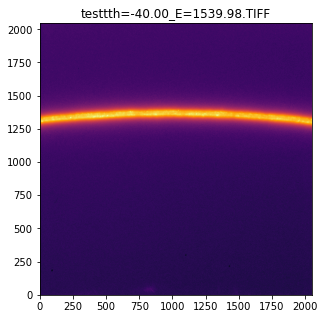

In [11]:
nimg = len(gonioref.single_geometries)
fig,ax = subplots(nimg, 1, figsize=(20,nimg*5))
for i, sg in enumerate(gonioref.single_geometries.values()):
    jupyter.display(sg=sg, ax=ax)
pass

In [12]:
gonioref.refine2()

AttributeError: 'NoneType' object has no attribute 'split'

In [15]:
ponis = [i for i in all_files if i.endswith(".poni")]
ponis.sort()
for fn in ponis:
    base = os.path.splitext(fn)[0]
    basename = os.path.basename(base)
    fimg = fabio.open(base + ".cbf")
    sg =gonioref.new_geometry(basename, image=fimg.data, metadata=basename, control_points=base+".npt",
                              geometry=fn, calibrant=LaB6)
    print(sg.label, "Angle:", sg.get_position())
    print(sg.geometry_refinement)
    print()
    

print("Filled refinement object:")
print(gonioref)

    

TypeError: 'odict_values' object is not subscriptable

In [16]:
fn = "C:\\Users\\wvx67826\Desktop\\i10_powder_2\\50_e=1540.poni"
fimg50 = fabio.open("C:\\Users\\wvx67826\Desktop\\i10_powder_2\\images\\testtth=-50.00_E=1539.98.TIFF")
basename = "testtth=-50.00_E=1539.98.TIFF"
sg =gonioref.new_geometry(basename, image=fimg.data,
                              geometry=fn, calibrant=LaB6)
#print(sg.label, "Angle:", sg.get_position())
print(sg.geometry_refinement)
print()
    

print("Filled refinement object:")
print(gonioref)


Detector Detector	 Spline= None	 PixelSize= 1.350e-05, 1.350e-05 m
Wavelength= 8.082412e-10m
SampleDetDist= 1.380000e-01m	PONI= 1.382062e-02, 1.382062e-02m	rot1=0.000000  rot2= -0.882533  rot3= 0.000000 rad
DirectBeamDist= 217.255mm	Center: x=1023.750, y=-11405.681 pix	Tilt=50.565 deg  tiltPlanRotation= -90.000 deg

Filled refinement object:
GoniometerRefinement with 2 geometries labeled: testtth=-40.00_E=1539.98.TIFF, testtth=-50.00_E=1539.98.TIFF.


In [65]:
multigeo = gonioref.get_mg(range(-40,-160,-10))

images = []
for i in range(-40,-160,-10):
    images.append(fabio.open("C:\\Users\\wvx67826\Desktop\\i10_powder_2\\images\\testtth=%i.00_E=1539.98.TIFF"%i).data)
multigeo.radial_range=(35, 155)
print(multigeo)

MultiGeometry integrator with 12 geometries on (35, 155) radial range (2th_deg) and (-180, 180) azimuthal range (deg)


In [66]:
# Calculate the optimal number of point for integration
over = 1
npt = int(over * numpy.deg2rad(max(multigeo.radial_range) - min(multigeo.radial_range)) / 
          numpy.arctan2(pilatus.pixel1, gonioref.nt_param(*gonioref.param).dist))
print("Number of bins: %s"%npt)

Number of bins: 21409


In [67]:
res = multigeo.integrate1d(images, npt)
jupyter.plot1d(res)
pass

TypeError: plot1d() missing 1 required positional argument: 'result'

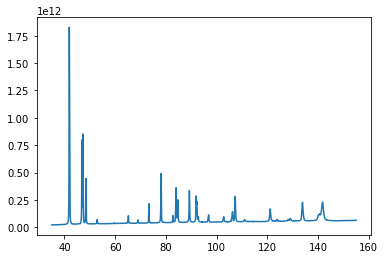

In [69]:
plt.plot(res[0],res[1])

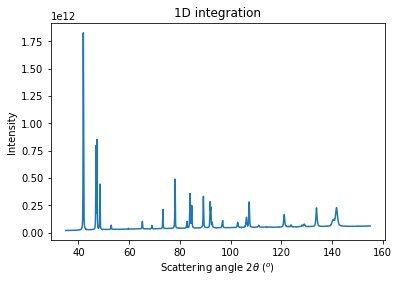

In [68]:
jupyter.plot1d(res)